In [1]:
%load_ext autoreload
%autoreload 2

import helper_functions as hf
from imports import *
import importlib

num_available_cpus = multiprocessing.cpu_count()
print("Number of available CPUs:", num_available_cpus)

torch.cuda.empty_cache()
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print("Device =", device)
torch.set_default_tensor_type('torch.cuda.FloatTensor') if torch.cuda.is_available() else print ('cpu')

torch.set_num_threads(num_available_cpus)

print("Number of threads:", torch.get_num_threads())
print("Number of interop threads:", torch.get_num_interop_threads())

Number of available CPUs: 80
Device = cuda:0
Number of threads: 80
Number of interop threads: 80


/nobackup/users/sambt/anaconda3/envs/quak/lib/python3.7/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
train_params = {"flow_type":"NSRATQUAD","tail_bound":10,"hidden_features":120,"num_layers":6,"num_blocks_per_layer":4,
                "clip":10,"patience":20,"learning_rate":5e-5,"save_model":True,"bs":10000}

In [3]:
signals_UL17 = ["Qstar2000_W400_UL17","Wp3000_B400_UL17","XYY_X3000_Y80_UL17"]

integer distribution detected...
integer distribution detected...
integer distribution detected...
integer distribution detected...
106583 QCDBKG training events
106574 QCDBKG testing events
integer distribution detected...
integer distribution detected...
23464 Qstar2000_W400_UL17 training events
2608 Qstar2000_W400_UL17 testing events
Initial: 23464 events 
Final: 22341 events 
Removed 4.7861%
Device = cuda:0
FCNN Hidden Layer Width:  120
------------------------------------
Loss:  100.03248
Loss:  87.08631
Loss:  74.50885
Loss:  64.65697
Loss:  57.43695
Loss:  52.478207
Loss:  48.21772
Loss:  44.831173
Loss:  42.757088
Loss:  41.449924
Loss:  38.577244
Loss:  38.043568
Loss:  35.510223
Loss:  35.089767
Loss:  32.90863
Loss:  32.839344
Loss:  30.957048
Loss:  31.44998
Loss:  29.822397
Iteration 20 Complete
Loss:  29.918367
NOT SAVING MODEL (PATIENCE = 1)
Time:  9.203816413879395
------------------------------------
Loss:  29.481901
Loss:  28.468569
Loss:  28.42689
Loss:  27.864773
Lo

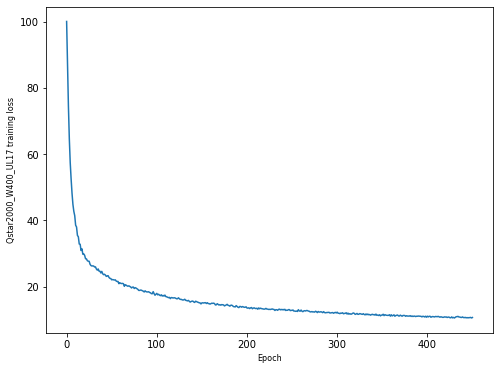

In [4]:
output = hf.train_pipeline_sig("Qstar2000_W400_UL17","QCDBKG",train_params,train_frac=0.9,bkg_model="QCDBKG_clip10_NSRATQUAD_k6_hf120_nbpl4_tb10.pt")
sig_flow = output[0]
bkg_flow = output[1]
sig_train_data, sig_train_unnorm_data, sig_train_masses = output[2]
sig_test_data, sig_test_unnorm_data, sig_test_masses = output[3]
bkg_test, bkg_test_unnorm, bkg_test_masses = output[4]
hf.eval_model(signals_UL17,"Qstar2000_W400_UL17",sig_flow,"QCDBKG",
              bkg_flow,bkg_test, bkg_test_unnorm, bkg_test_masses,train_frac=0.9)

integer distribution detected...
integer distribution detected...
integer distribution detected...
integer distribution detected...
106583 QCDBKG training events
106574 QCDBKG testing events
integer distribution detected...
integer distribution detected...
33417 Wp3000_B400_UL17 training events
3714 Wp3000_B400_UL17 testing events
Initial: 33417 events 
Final: 33050 events 
Removed 1.0982%
Device = cuda:0
FCNN Hidden Layer Width:  120
------------------------------------
Loss:  120.995186
Loss:  98.75818
Loss:  82.27195
Loss:  69.34075
Loss:  60.036266
Loss:  52.084755
Loss:  46.865944
Loss:  42.57605
Loss:  39.92358
Loss:  37.845566
Loss:  36.219646
Loss:  34.66472
Loss:  33.605072
Loss:  32.447617
Loss:  31.989475
Loss:  30.87013
Loss:  30.223612
Loss:  29.539988
Loss:  29.215712
Iteration 20 Complete
Loss:  28.769775
SAVING MODEL
Time:  10.451343297958374
------------------------------------
Loss:  27.860071
Loss:  27.616224
Loss:  27.10687
Loss:  26.57481
Loss:  26.28083
Loss:  25.

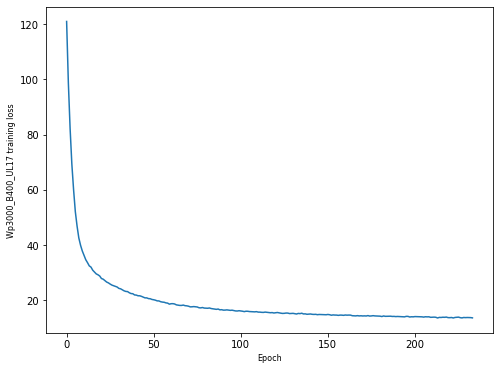

In [4]:
output = hf.train_pipeline_sig("Wp3000_B400_UL17","QCDBKG",train_params,train_frac=0.9,bkg_model="QCDBKG_clip10_NSRATQUAD_k6_hf120_nbpl4_tb10.pt")
sig_flow = output[0]
bkg_flow = output[1]
sig_train_data, sig_train_unnorm_data, sig_train_masses = output[2]
sig_test_data, sig_test_unnorm_data, sig_test_masses = output[3]
bkg_test, bkg_test_unnorm, bkg_test_masses = output[4]
hf.eval_model(signals_UL17,"Wp3000_B400_UL17",sig_flow,"QCDBKG",
              bkg_flow,bkg_test, bkg_test_unnorm, bkg_test_masses,train_frac=0.9)

integer distribution detected...
integer distribution detected...
integer distribution detected...
integer distribution detected...
106583 QCDBKG training events
106574 QCDBKG testing events
integer distribution detected...
integer distribution detected...
43592 XYY_X3000_Y80_UL17 training events
4844 XYY_X3000_Y80_UL17 testing events
Initial: 43592 events 
Final: 43589 events 
Removed 0.0069%
Device = cuda:0
FCNN Hidden Layer Width:  120
------------------------------------
Loss:  72.08931
Loss:  51.822342
Loss:  41.732693
Loss:  36.26471
Loss:  32.315075
Loss:  30.261057
Loss:  28.786165
Loss:  26.927612
Loss:  26.452099
Loss:  25.132097
Loss:  24.604403
Loss:  23.977032
Loss:  23.344238
Loss:  23.047432
Loss:  22.235594
Loss:  21.915451
Loss:  21.275063
Loss:  21.461899
Loss:  20.656164
Iteration 20 Complete
Loss:  20.353802
SAVING MODEL
Time:  12.698644161224365
------------------------------------
Loss:  20.004858
Loss:  19.48744
Loss:  19.571533
Loss:  19.078398
Loss:  18.993477


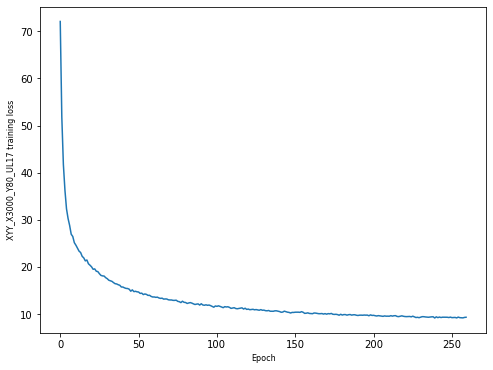

In [5]:
output = hf.train_pipeline_sig("XYY_X3000_Y80_UL17","QCDBKG",train_params,train_frac=0.9,bkg_model="QCDBKG_clip10_NSRATQUAD_k6_hf120_nbpl4_tb10.pt")
sig_flow = output[0]
bkg_flow = output[1]
sig_train_data, sig_train_unnorm_data, sig_train_masses = output[2]
sig_test_data, sig_test_unnorm_data, sig_test_masses = output[3]
bkg_test, bkg_test_unnorm, bkg_test_masses = output[4]
hf.eval_model(signals_UL17,"XYY_X3000_Y80_UL17",sig_flow,"QCDBKG",
              bkg_flow,bkg_test, bkg_test_unnorm, bkg_test_masses,train_frac=0.9)

integer distribution detected...
integer distribution detected...
integer distribution detected...
integer distribution detected...
106583 QCDBKG training events
106574 QCDBKG testing events
integer distribution detected...
integer distribution detected...
23464 Qstar2000_W400_UL17 training events
2608 Qstar2000_W400_UL17 testing events
integer distribution detected...
integer distribution detected...
43592 XYY_X3000_Y80_UL17 training events
4844 XYY_X3000_Y80_UL17 testing events
Initial: 67056 events 
Final: 65930 events 
Removed 1.6792%
Device = cuda:0
FCNN Hidden Layer Width:  120
------------------------------------
Loss:  87.48734
Loss:  62.488857
Loss:  48.164635
Loss:  40.87846
Loss:  36.125694
Loss:  32.44304
Loss:  30.366674
Loss:  28.858719
Loss:  27.62781
Loss:  26.621998
Loss:  25.793344
Loss:  25.423204
Loss:  24.405003
Loss:  23.784918
Loss:  23.60219
Loss:  22.951271
Loss:  22.578655
Loss:  22.093925
Loss:  21.746157
Iteration 20 Complete
Loss:  21.608118
SAVING MODEL
Ti

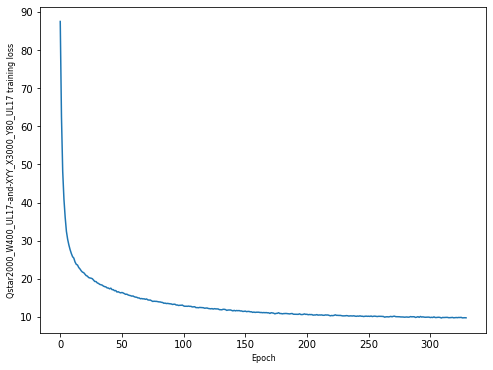

In [6]:
samps = ["Qstar2000_W400_UL17","XYY_X3000_Y80_UL17"]
name = "-and-".join(samps)
output = hf.train_pipeline_sig(samps,"QCDBKG",train_params,train_frac=0.9,bkg_model="QCDBKG_clip10_NSRATQUAD_k6_hf120_nbpl4_tb10.pt")
sig_flow = output[0]
bkg_flow = output[1]
sig_train_data, sig_train_unnorm_data, sig_train_masses = output[2]
sig_test_data, sig_test_unnorm_data, sig_test_masses = output[3]
bkg_test, bkg_test_unnorm, bkg_test_masses = output[4]
hf.eval_model(signals_UL17,name,sig_flow,"QCDBKG",
              bkg_flow,bkg_test, bkg_test_unnorm, bkg_test_masses,train_frac=0.9)

integer distribution detected...
integer distribution detected...
integer distribution detected...
integer distribution detected...
106583 QCDBKG training events
106574 QCDBKG testing events
integer distribution detected...
integer distribution detected...
33417 Wp3000_B400_UL17 training events
3714 Wp3000_B400_UL17 testing events
integer distribution detected...
integer distribution detected...
43592 XYY_X3000_Y80_UL17 training events
4844 XYY_X3000_Y80_UL17 testing events
Initial: 77009 events 
Final: 76639 events 
Removed 0.4805%
Device = cuda:0
FCNN Hidden Layer Width:  120
------------------------------------
Loss:  75.39022
Loss:  55.037178
Loss:  44.214
Loss:  37.70912
Loss:  33.712666
Loss:  30.487833
Loss:  28.618168
Loss:  27.072325
Loss:  26.11693
Loss:  25.23073
Loss:  24.296118
Loss:  23.706827
Loss:  23.067781
Loss:  22.419561
Loss:  21.788675
Loss:  21.222944
Loss:  20.841381
Loss:  20.478485
Loss:  20.116886
Iteration 20 Complete
Loss:  19.964787
SAVING MODEL
Time:  21.

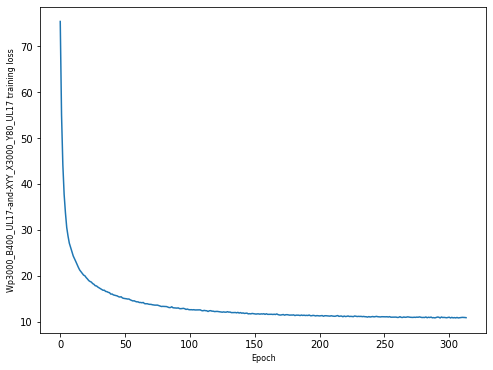

In [4]:
samps = ["Wp3000_B400_UL17","XYY_X3000_Y80_UL17"]
name = "-and-".join(samps)
output = hf.train_pipeline_sig(samps,"QCDBKG",train_params,train_frac=0.9,bkg_model="QCDBKG_clip10_NSRATQUAD_k6_hf120_nbpl4_tb10.pt")
sig_flow = output[0]
bkg_flow = output[1]
sig_train_data, sig_train_unnorm_data, sig_train_masses = output[2]
sig_test_data, sig_test_unnorm_data, sig_test_masses = output[3]
bkg_test, bkg_test_unnorm, bkg_test_masses = output[4]
hf.eval_model(signals_UL17,name,sig_flow,"QCDBKG",
              bkg_flow,bkg_test, bkg_test_unnorm, bkg_test_masses,train_frac=0.9)

integer distribution detected...
integer distribution detected...
integer distribution detected...
integer distribution detected...
106583 QCDBKG training events
106574 QCDBKG testing events
integer distribution detected...
integer distribution detected...
23464 Qstar2000_W400_UL17 training events
2608 Qstar2000_W400_UL17 testing events
integer distribution detected...
integer distribution detected...
33417 Wp3000_B400_UL17 training events
3714 Wp3000_B400_UL17 testing events
Initial: 56881 events 
Final: 55391 events 
Removed 2.6195%
Device = cuda:0
FCNN Hidden Layer Width:  120
------------------------------------
Loss:  104.7334
Loss:  75.87962
Loss:  58.059322
Loss:  47.977757
Loss:  41.927696
Loss:  38.103657
Loss:  35.84028
Loss:  33.496788
Loss:  31.71933
Loss:  30.570543
Loss:  29.79489
Loss:  28.772305
Loss:  28.055069
Loss:  27.860655
Loss:  27.104422
Loss:  26.743189
Loss:  26.34342
Loss:  25.577377
Loss:  25.42896
Iteration 20 Complete
Loss:  25.249277
SAVING MODEL
Time:  1

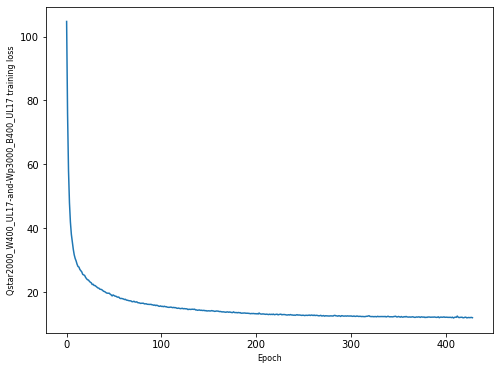

In [4]:
samps = ["Qstar2000_W400_UL17","Wp3000_B400_UL17"]
name = "-and-".join(samps)
output = hf.train_pipeline_sig(samps,"QCDBKG",train_params,train_frac=0.9,bkg_model="QCDBKG_clip10_NSRATQUAD_k6_hf120_nbpl4_tb10.pt")
sig_flow = output[0]
bkg_flow = output[1]
sig_train_data, sig_train_unnorm_data, sig_train_masses = output[2]
sig_test_data, sig_test_unnorm_data, sig_test_masses = output[3]
bkg_test, bkg_test_unnorm, bkg_test_masses = output[4]
hf.eval_model(signals_UL17,name,sig_flow,"QCDBKG",
              bkg_flow,bkg_test, bkg_test_unnorm, bkg_test_masses,train_frac=0.9)

integer distribution detected...
integer distribution detected...
integer distribution detected...
integer distribution detected...
106583 QCDBKG training events
106574 QCDBKG testing events
integer distribution detected...
integer distribution detected...
23464 Qstar2000_W400_UL17 training events
2608 Qstar2000_W400_UL17 testing events
integer distribution detected...
integer distribution detected...
33417 Wp3000_B400_UL17 training events
3714 Wp3000_B400_UL17 testing events
integer distribution detected...
integer distribution detected...
43592 XYY_X3000_Y80_UL17 training events
4844 XYY_X3000_Y80_UL17 testing events
Initial: 100473 events 
Final: 98980 events 
Removed 1.4860%
Device = cuda:0
FCNN Hidden Layer Width:  120
------------------------------------
Loss:  64.00983
Loss:  46.620255
Loss:  37.621166
Loss:  33.23078
Loss:  30.871374
Loss:  28.379925
Loss:  27.074389
Loss:  25.802847
Loss:  25.047892
Loss:  24.208296
Loss:  23.476538
Loss:  22.843779
Loss:  22.143131
Loss:  21.

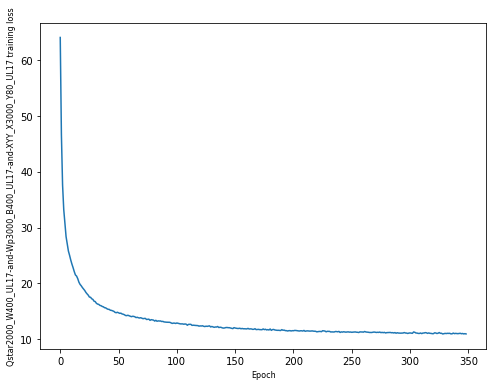

In [4]:
samps = ["Qstar2000_W400_UL17","Wp3000_B400_UL17","XYY_X3000_Y80_UL17"]
name = "-and-".join(samps)
output = hf.train_pipeline_sig(samps,"QCDBKG",train_params,train_frac=0.9,bkg_model="QCDBKG_clip10_NSRATQUAD_k6_hf120_nbpl4_tb10.pt")
sig_flow = output[0]
bkg_flow = output[1]
sig_train_data, sig_train_unnorm_data, sig_train_masses = output[2]
sig_test_data, sig_test_unnorm_data, sig_test_masses = output[3]
bkg_test, bkg_test_unnorm, bkg_test_masses = output[4]
hf.eval_model(signals_UL17,name,sig_flow,"QCDBKG",
              bkg_flow,bkg_test, bkg_test_unnorm, bkg_test_masses,train_frac=0.9)